# Make plots based on the thermalization conjecture

In [49]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy as sc
from scipy.interpolate import interp1d
%matplotlib inline

In [50]:
from RFCTool import *

In [51]:
# Import data for comparison from SIMION
dat80=pd.read_csv("Data/TravelDist/N4/V80.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist80=np.mean(30-dat80.x)
mediandist80=np.median(30-dat80.x)
stddist80=np.std(30-dat80.x)

dat90=pd.read_csv("Data/TravelDist/N4/V90.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist90=np.mean(30-dat90.x)
stddist90=np.std(30-dat90.x)
mediandist90=np.median(30-dat90.x)

dat120=pd.read_csv("Data/TravelDist/N4/V120.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist120=np.mean(30-dat120.x)
stddist120=np.std(30-dat120.x)
mediandist120=np.median(30-dat120.x)

dat140=pd.read_csv("Data/TravelDist/N4/V140.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist140=np.mean(30-dat140.x)
stddist140=np.std(30-dat140.x)
mediandist140=np.median(30-dat140.x)

dat160=pd.read_csv("Data/TravelDist/N4/V160.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist160=np.mean(30-dat160.x)
stddist160=np.std(30-dat160.x)
mediandist160=np.median(30-dat160.x)

dat180=pd.read_csv("Data/TravelDist/N4/V180.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist180=np.mean(30-dat180.x)
stddist180=np.std(30-dat180.x)
mediandist180=np.median(30-dat180.x)

dat3_100=pd.read_csv("Data/TravelDist/N3/V100.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist3_100=np.mean(30-dat3_100.x)
stddist3_100=np.std(30-dat3_100.x)
mediandist3_100=np.median(30-dat3_100.x)

dat3_120=pd.read_csv("Data/TravelDist/N3/V120.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist3_120=np.mean(30-dat3_120.x)
stddist3_120=np.std(30-dat3_120.x)
mediandist3_120=np.median(30-dat3_120.x)

dat3_140=pd.read_csv("Data/TravelDist/N3/V140.txt",delimiter=',',names=['t','y','x','z','v','ke'])
meandist3_140=np.mean(30-dat3_140.x)
stddist3_140=np.std(30-dat3_140.x)
mediandist3_140=np.median(30-dat3_140.x)

In [56]:
#Import mobility and effective mass functions

import pickle
f=open("Data/MobilityFunctions.pkl", 'rb')
[Mob2, Mass2, Mob1, Mass1]=pickle.load(f)
fT=open("Data/MobilityFunctionsT.pkl", 'rb')
[Mob2T, Mass2T, Mob1T, Mass1T]=pickle.load(fT)

/var/folders/0l/sqknt5xn1w3dx48zsbjg_7800000gn/T/ipykernel_48811/173289308.py:5: DeprecationWarning: Please use `interp1d` from the `scipy.interpolate` namespace, the `scipy.interpolate.interpolate` namespace is deprecated.
  [Mob2, Mass2, Mob1, Mass1]=pickle.load(f)
/var/folders/0l/sqknt5xn1w3dx48zsbjg_7800000gn/T/ipykernel_48811/173289308.py:7: DeprecationWarning: Please use `interp1d` from the `scipy.interpolate` namespace, the `scipy.interpolate.interpolate` namespace is deprecated.
  [Mob2T, Mass2T, Mob1T, Mass1T]=pickle.load(fT)


In [58]:
# Set up RFC objects
RFS3=RFCSettings()
RFS3.N     = 3
RFS3.m     = 952
RFS3.q     = 2
RFS3.p     = 0.16*1e-3
RFS3.Epush = 20*1e2
RFS3.T     = 273
RFS3.Omega = 2*3.1428*13.56e6
RFS3.Vpp   = 400
RFS3.mu    = 0.00034           # from stat mech expression in paper
RFS3.ymin  = 0.25*RFS3.p+1e-5  # Add 1e-5 to account for SIMION grid offset

RFS4=RFCSettings()
RFS4.N     = 4
RFS4.m     = 952
RFS4.q     = 2
RFS4.p     = 0.16*1e-3
RFS4.Epush = 20*1e2
RFS4.T     = 273
RFS4.Omega = 2*3.1428*13.56e6
RFS4.Vpp   = 400
RFS4.mu    = 0.00034 
RFS4.ymin  = 0.25*RFS4.p+1e-5

In [53]:
#Calculate thermal losses for example plot

Loss3=[]
Loss4=[]


RFC3=RFC(RFS3)
RFC4=RFC(RFS4)
VMin3=RFC3.VMin()
VMin4=RFC4.VMin()

Vs3=np.linspace(VMin3, 500, 100)
Vs4=np.linspace(VMin4, 500, 100)

DistsLoss3=[]
DistsLoss4=[]
for V in Vs3:
    RFS3.Vpp=V
    RFC3.Update(RFS3)
    DistsLoss3.append(RFC3.IntegralDistLoss())
    Loss3.append(1/RFC3.LossFunction()*1000)

for V in Vs4:
    RFS4.Vpp=V
    RFC4.Update(RFS4)
    DistsLoss4.append(RFC4.IntegralDistLoss())
    Loss4.append(1/RFC4.LossFunction()*1000)



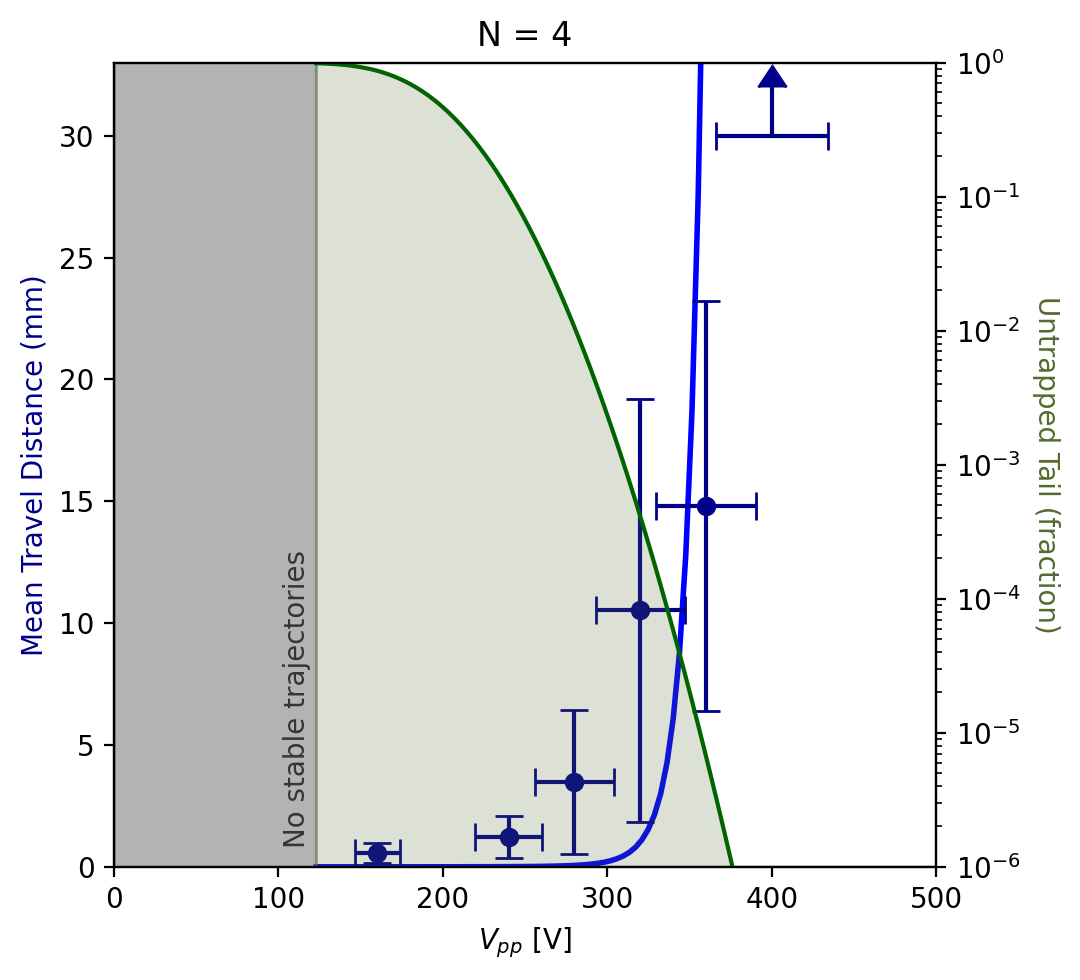

<Figure size 432x288 with 0 Axes>

In [54]:
#Thermal loss plot

fig, ax1 = plt.subplots(figsize=(5.5,5),dpi=200)

ax2 = ax1.twinx()

ax1.plot(Vs4, Loss4,label='Loss Function',color='blue',linewidth=2)
ax2.fill_betweenx([0,30],[0,0],[VMin4,VMin4],label='no stable trajectories',color='dimgrey',alpha=0.5)
ax2.fill_between(Vs4,1e-6,DistsLoss4,label='stable w/ thermal losses',color='darkolivegreen',alpha=0.2)
ax2.plot(Vs4,DistsLoss4,label='thermal at $y<y_{loss}$',color='DarkGreen')

VsDat4=np.array([160,240,280,320,360])
ax1.errorbar(VsDat4,[meandist80,meandist120,meandist140,meandist160,meandist180],xerr=VsDat4*0.085,yerr=[stddist80,stddist120,stddist140,stddist160,stddist180],fmt='o',color='DarkBlue',capsize=5)
ax1.errorbar([400],[30],xerr=400*0.085,color='DarkBlue',lolims=True,yerr=2,capsize=5)

ax1.set_ylabel(r"Mean Travel Distance (mm)",color='DarkBlue')
ax2.set_ylabel(r"Untrapped Tail (fraction)",color='darkolivegreen',rotation=270,va='bottom')
ax2.set_ylim(1e-6,1)
ax2.semilogy()

ax1.set_xlabel(r"$V_{pp}$ [V]")
plt.title(r"N = 4")
ax2.set_xlim(0,500)
ax1.text(VMin4-20,1,"No stable trajectories",rotation=90)


ax1.set_ylim(0,33)
plt.tight_layout()
plt.show()
plt.savefig("Plots/ThermaLossN4.png",dpi=200,bbox_inches='tight')

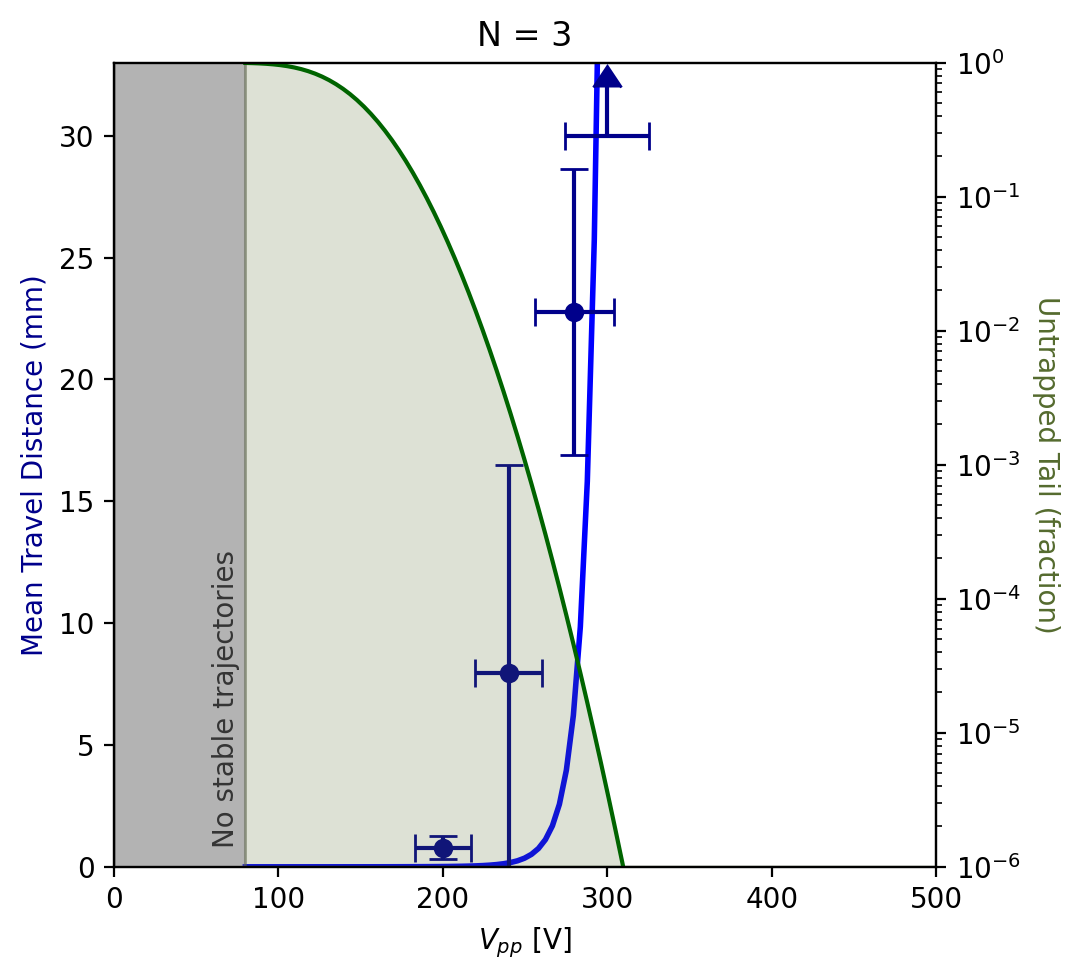

In [55]:
fig, ax1 = plt.subplots(figsize=(5.5,5),dpi=200)

ax2 = ax1.twinx()
VsDat3=np.array([200,240,280])


ax2.fill_betweenx([0,30],[0,0],[VMin3,VMin3],label='no stable trajectories',color='dimgrey',alpha=0.5)
ax2.fill_between(Vs3,1e-6,DistsLoss3,label='stable w/ thermal losses',color='darkolivegreen',alpha=0.2)

ax2.plot(Vs3,DistsLoss3,label='thermal at $y<y_{loss}$',color='DarkGreen')
ax1.plot(Vs3, Loss3,label='Loss Function',color='blue',linewidth=2)
ax1.errorbar(VsDat3,[meandist3_100,meandist3_120,meandist3_140],yerr=[stddist3_100,stddist3_120,stddist3_140],xerr=VsDat3*0.085,fmt='o',color='DarkBlue',capsize=5)
ax1.errorbar([300],[30],xerr=300*0.085,color='DarkBlue',lolims=True,yerr=2,capsize=5)

ax1.set_ylabel(r"Mean Travel Distance (mm)",color='DarkBlue')
ax2.set_ylabel(r"Untrapped Tail (fraction)",color='darkolivegreen',rotation=270,va='bottom')
ax2.set_ylim(1e-6,1)
ax2.semilogy()

ax1.set_xlabel(r"$V_{pp}$ [V]")
plt.title(r"N = 3")
ax1.text(VMin3-20,1,"No stable trajectories",rotation=90)
ax2.set_xlim(0,500)
ax1.set_ylim(0,33)
plt.tight_layout()
plt.savefig("Plots/ThermaLossN3.png",dpi=200,bbox_inches='tight')

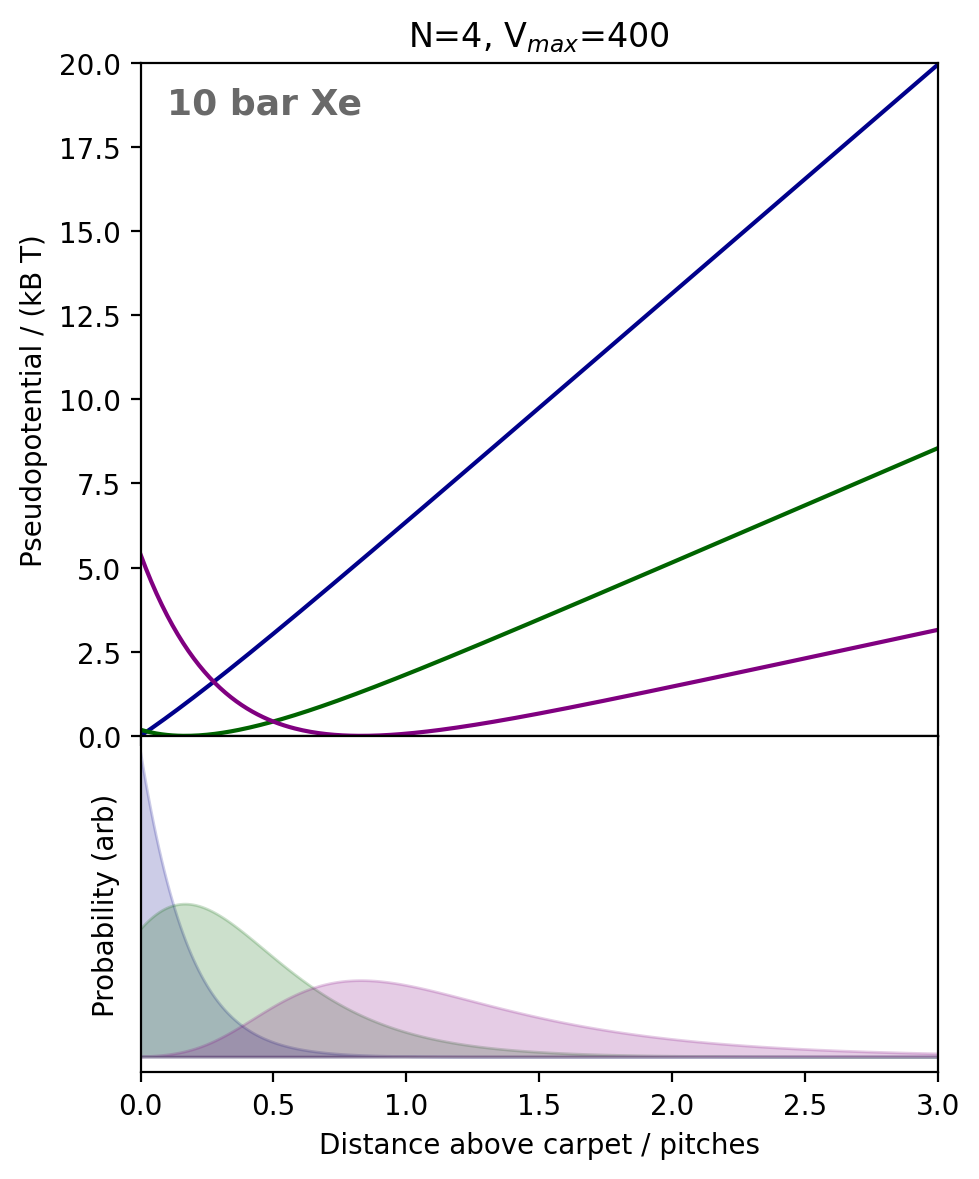

In [88]:
# Potential plot 
fig = plt.figure(figsize=(5,6),dpi=200)
gs = fig.add_gridspec(2, hspace=0,height_ratios=[2,1])
[ax1, ax2] = gs.subplots(sharex=True)
cols=['DarkBlue', 'DarkGreen','purple']


RFS4.mu = Mob1(P)*1e-4
RFS4.m  = Mass2(P)
RFS4.yloss=0

VFactor=1./np.sin(pi/RFC4.N)

ps=[40e-6,20e-6,10e-6]
for i in range(0,len(ps)):
    p=ps[i]
    y=np.arange(0,5*p,0.01*p)


    RFS4.p  = p
    RFC4.Update(RFS4)
    ax1.plot(y/p,(RFC4.CalcV(y)-min(RFC4.CalcV(y)))/(kB*RFC4.T),color=cols[i],label=r'p='+str(int(p*1e6))+'$\mu$m')
    ax2.fill_between(y/p,0,RFC4.DistributionFunction(y,norm=1)*p,color=cols[i],alpha=0.2)

ax1.set_ylabel("Pseudopotential / (kB T)")
ax2.set_xlabel("Distance above carpet / pitches")

ax2.set_yticks([])
ax2.set_ylabel("Probability (arb)")
plt.xlim(0,3)
ax1.set_ylim(0,20)
#ax2.set_ylim(0,3.5)

ax1.text(0.1,18.5,"10 bar Xe",color='DimGrey',weight='bold',fontsize=13)
ax1.set_title(r'N='+str(RFS4.N)+', V$_{max}$='+str(RFS4.Vpp))
plt.tight_layout()
plt.savefig("Plots/Dist10barN"+str(RFS4.N)+"V"+str(RFS4.Vpp)+".png",bbox_inches='tight',dpi=200)

In [19]:
v=RFC4.EquilVelocity()*1000

def DToT(x):
    return x*v
def TToD(x):
    return x/v

In [26]:
#Find thresholds for stable transport

def FindThresholdV(RFS, threshdist=15):
    RFC4=RFC(RFS)
    vmin=RFC4.VMin()
    VFactor=np.sin(pi/RFS.N)
    Vs=np.linspace(vmin, 4000/VFactor, 200)
    Losses=[]
    for V in Vs:
        RFS.Vpp=V
        RFC4.Update(RFS)
        Losses.append(1/RFC4.LossFunction()*100)
        if(Losses[-1]>threshdist):
            break
    interpfn=interp1d(Losses,Vs[0:len(Losses)],kind='linear')
    return [vmin, interpfn(threshdist)]


In [47]:
# Pressure scan at fixed pitch

threshs=[]
RFS4.N     = 4
RFS4.q     = 2
RFS4.Epush = 20*1e2
RFS4.Omega = 2*3.1428*13.56e6
RFS4.p     = 20e-6
RFS4.yloss  = 0.25*RFS4.p

Ps=np.arange(0.3,10.3,0.1)
Thresh_cold = []
Thresh_rt   = []
for P in Ps:
    RFS4.T=293
    RFS4.m=Mass2(P)
    RFS4.mu=Mob2(P)*1e-4
    Thresh_rt.append(FindThresholdV(RFS4))
    RFS4.T=220
    RFS4.m=Mass2T(P)
    RFS4.mu=Mob2T(P)*1e-4
    Thresh_cold.append(FindThresholdV(RFS4))
    

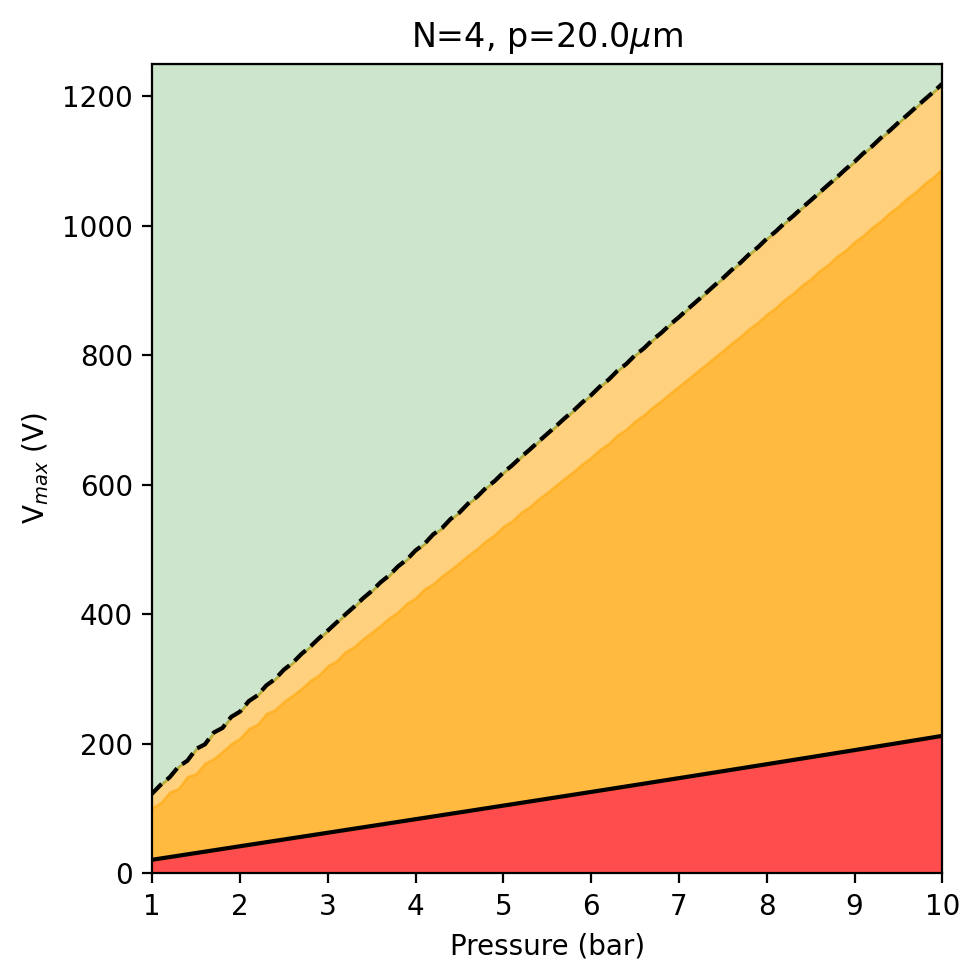

In [48]:
plt.figure(figsize=(5,5),dpi=200)
VTop=1250
threshs_max_rt   = np.array(Thresh_rt)*np.sin(pi/4)
threshs_max_cold = np.array(Thresh_cold)*np.sin(pi/4)

plt.fill_between(Ps,0,threshs_max_cold[:,0],color='red',alpha=0.7)
plt.fill_between(Ps,threshs_max_cold[:,0],threshs_max_cold[:,1],color='orange',alpha=0.5)
plt.fill_between(Ps,threshs_max_cold[:,0],threshs_max_rt[:,1],color='orange',alpha=0.5)
plt.fill_between(Ps,threshs_max_rt[:,1],VTop,color='green',alpha=0.2)
plt.plot(Ps,threshs_max_rt[:,1],'--',color='black')
plt.plot(Ps,threshs_max_cold[:,0],'-',color='black')
plt.ylim(0,VTop)
plt.xlim(1,10)
plt.xticks(range(1,11))
plt.title("N="+str(RFS4.N)+", p="+str(RFS4.p*1e6)+'$\mu$m')
plt.xlabel("Pressure (bar)")
plt.ylabel("V$_{max}$ (V)")
plt.tight_layout()
plt.savefig("Plots/N4p20Stab.png",dpi=200,bbox_inches='tight')

In [41]:
# Pitch scan at fixed pressure

ps=np.arange(2e-6,42e-6,2e-6)
threshs=[]
P=10
RFS4.N     = 4
RFS4.q     = 2
RFS4.m     = Mass2(P)
RFS4.mu    = Mob2(P)*1e-4
RFS4.Epush = 20*1e2
RFS4.Omega = 2*3.1428*13.56e6

Thresh_cold = []
Thresh_rt   = []
for p in ps:
    RFS4.p=p
    RFS4.T=293
    RFS4.yloss  = 0.25*RFS4.p
    Thresh_rt.append(FindThresholdV(RFS4))
    RFS4.p=p
    RFS4.T=220
    RFS4.yloss  = 0.25*RFS4.p
    Thresh_cold.append(FindThresholdV(RFS4))


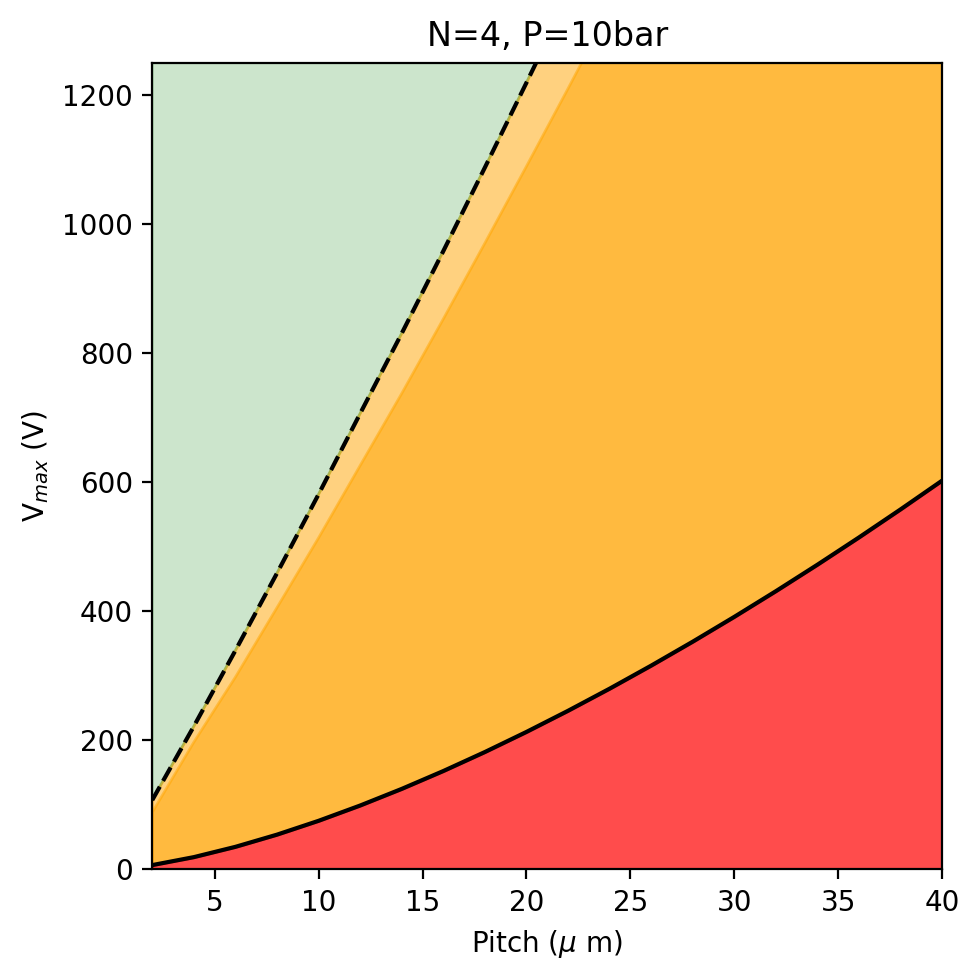

In [46]:
plt.figure(figsize=(5,5),dpi=200)
VTop=1250
threshs_max_rt   = np.array(Thresh_rt)*np.sin(pi/4)
threshs_max_cold = np.array(Thresh_cold)*np.sin(pi/4)

plt.fill_between(ps*1e6,0,threshs_max_cold[:,0],color='red',alpha=0.7)
plt.fill_between(ps*1e6,threshs_max_cold[:,0],threshs_max_cold[:,1],color='orange',alpha=0.5)
plt.fill_between(ps*1e6,threshs_max_cold[:,0],threshs_max_rt[:,1],color='orange',alpha=0.5)
plt.fill_between(ps*1e6,threshs_max_rt[:,1],VTop,color='green',alpha=0.2)
plt.plot(ps*1e6,threshs_max_rt[:,1],'--',color='black')
plt.plot(ps*1e6,threshs_max_cold[:,0],'-',color='black')
plt.ylim(0,VTop)
plt.xlim(2,40)
#plt.xlim(10,200)
#plt.xticks(range(1,11))
plt.title("N="+str(RFS4.N)+", P="+str(RFS4.P)+'bar')
plt.xlabel("Pitch ($\mu$ m)")
plt.ylabel("V$_{max}$ (V)")
plt.tight_layout()
plt.savefig("Plots/N4pr10Stab.png",dpi=200,bbox_inches='tight')

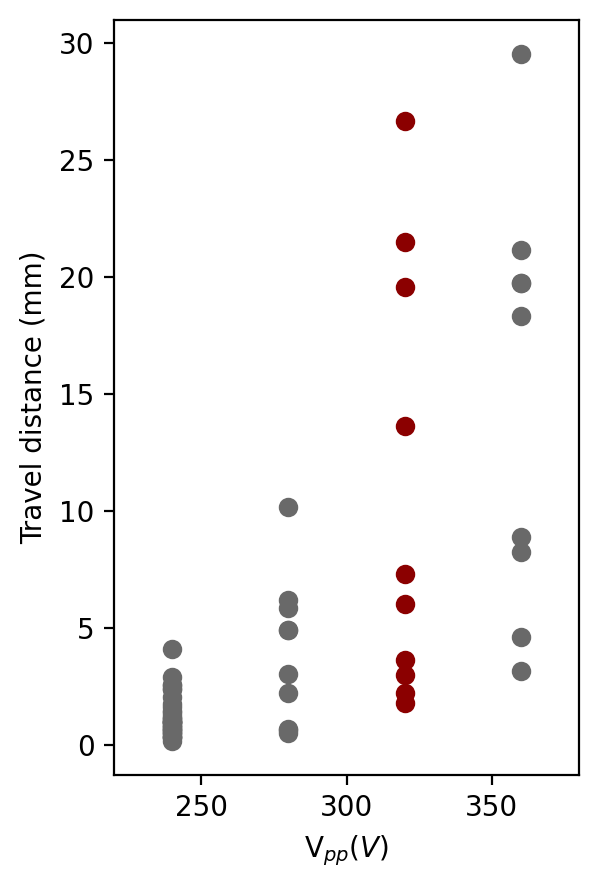

In [35]:
#SIMION data scatter plot
plt.figure(figsize=(3,5),dpi=200)
plt.scatter(np.ones_like(dat160.x)*320,30-dat160.x,color='DarkRed')
plt.scatter(np.ones_like(dat180.x)*360,30-dat180.x,color='dimgrey')
plt.scatter(np.ones_like(dat140[0:10].x)*280,30-dat140[0:10].x,color='dimgrey')
plt.scatter(np.ones_like(dat120.x)*240,30-dat120.x,color='dimgrey')
plt.xlim(220,380)
plt.ylabel("Travel distance (mm)")
plt.xlabel("V$_{pp} (V)$")
plt.savefig("Plots/SIMIONScatter.png",dpi=200)
